In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import decimal
import os
import re

In [2]:
file_num = 0
files = [file for file in os.listdir(".") if (file.lower().endswith(""))]
# files = [file for file in os.listdir("./slices/")
files.sort(key=os.path.getmtime)
for file in sorted(files,key=os.path.getmtime):
    if file[0] == "s":
        file_num+=1

print(file_num)

1068


In [3]:
# output_interval = 0.05

sample_profile = np.loadtxt('./slice-0', usecols = (1, 4), skiprows=1, dtype=np.float32)
xCoord = sample_profile[:, 0]
ele_num = np.size(sample_profile[:, 0])
sol_comb = np.zeros((ele_num, file_num))
f1 = ' '
# end_time = 98.55

n_val = 0.3
beta = 2.0*(2.0*n_val+1.0)/(2.0+3.0*n_val)
grav = 9.81
nd = 0.380937
nv = 3.39152
slope = 0.06

counter = 0

# for i in range(0, file_num):
for file in sorted(files, key=os.path.getmtime):
# #     f1 = float("{:3.10f}".format(i*output_interval))
# #     f1 = np.format_float_positional((i*output_interval), trim='-')
# #     ii, dd = divmod(f1, 1)
# #     if dd > 1e-3:
# #         time_norm = decimal.Decimal(str(f1)).normalize()
# #     else:
# #         time_norm = int(f1)
# #     time_normStr = str(time_norm)
    if file[0] == "s":
        sample_profile = np.loadtxt(file, usecols = (4), skiprows=1, dtype=np.float32)
        sol_comb[:, counter] = sample_profile
        print(file)
        counter += 1
        
print(counter)

slice-0
slice-0.138396
slice-0.53934
slice-0.401066
slice-0.267968
slice-0.817266
slice-0.957134
slice-0.678955
slice-1.37502
slice-1.09732
slice-1.23662
slice-1.64963
slice-1.51273
slice-1.92126
slice-1.78581
slice-2.05621
slice-2.45706
slice-2.19053
slice-2.3242
slice-2.85392
slice-2.72192
slice-2.58992
slice-2.98593
slice-3.11713
slice-3.37885
slice-3.24817
slice-3.50883
slice-3.76877
slice-3.6388
slice-3.89875
slice-4.02872
slice-4.15845
slice-4.28693
slice-4.41541
slice-4.54389
slice-4.80085
slice-4.92933
slice-4.67237
slice-5.05781
slice-5.18386
slice-5.30942
slice-5.43498
slice-5.6861
slice-5.56054
slice-5.81166
slice-5.93722
slice-6.19043
slice-6.31719
slice-6.0636
slice-6.56991
slice-6.44363
slice-6.69611
slice-6.82189
slice-6.94767
slice-7.07346
slice-7.32405
slice-7.1988
slice-7.57406
slice-7.44929
slice-7.94757
slice-7.69874
slice-7.82341
slice-8.07162
slice-8.19568
slice-8.44379
slice-8.31973
slice-8.56784
slice-8.69189
slice-8.81518
slice-8.93846
slice-9.06174
slice-9.185

slice-57.5948
slice-57.6595
slice-57.7242
slice-57.7889
slice-57.8536
slice-57.9183
slice-57.9831
slice-58.0478
slice-58.1125
slice-58.1772
slice-58.2419
slice-58.3066
slice-58.3713
slice-58.4361
slice-58.5008
slice-58.5655
slice-58.6302
slice-58.6949
slice-58.7596
slice-58.8243
slice-58.8891
slice-58.9538
slice-59.0185
slice-59.0832
slice-59.1479
slice-59.2126
slice-59.2773
slice-59.3421
slice-59.4068
slice-59.4715
slice-59.5362
slice-59.6009
slice-59.6656
slice-59.7304
slice-59.7951
slice-59.8598
slice-59.9245
slice-59.9892
slice-60.0541
slice-60.1189
slice-60.1838
slice-60.2486
slice-60.3135
slice-60.3784
slice-60.4432
slice-60.5081
slice-60.573
slice-60.638
slice-60.703
slice-60.7682
slice-60.8335
slice-60.8989
slice-60.9644
slice-61.0301
slice-61.096
slice-61.162
slice-61.2282
slice-61.2946
slice-61.3611
slice-61.4279
slice-61.4948
slice-61.5618
slice-61.6291
slice-61.6965
slice-61.764
slice-61.8317
slice-61.8996
slice-61.9677
slice-62.036
slice-62.1045
slice-62.1732
slice-62.2422

In [4]:
np.shape(sol_comb)

(1075, 1068)

In [5]:
# normalization
sol_comb_norm = sol_comb/nd
xCoord_norm = slope*xCoord/nd
lx_norm = np.max(xCoord_norm)
xb_norm = 50.0
xCenter_norm = 50+75.0*nd/2.0/(nv**2.0/(grav*slope))
width_norm = slope*75*nd/(nd)

In [ ]:
# sort h and x arrays
# xCoord_norm_inds = xCoord_norm.argsort()
# sorted_xCoord_norm = xCoord_norm[xCoord_norm_inds[::-1]]
# sorted_arr2 = arr2[xCoord_norm_inds[::-1]]

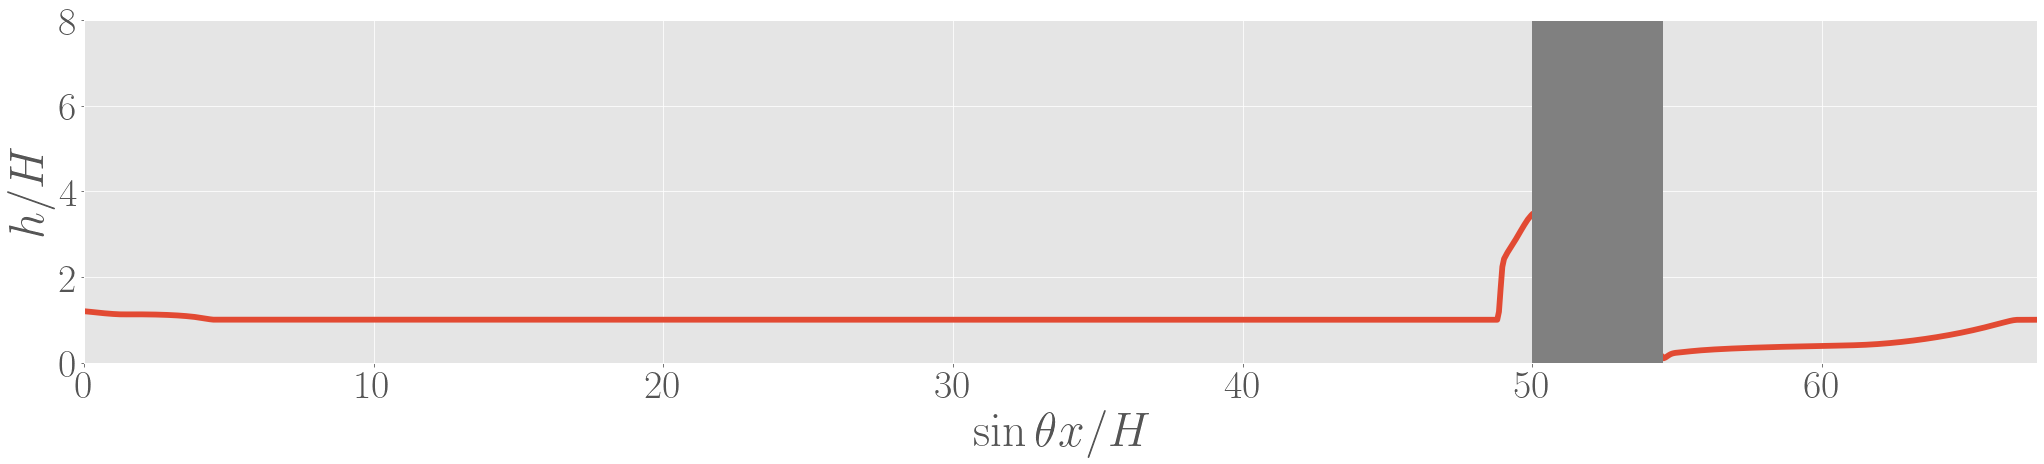

In [12]:
# a static plot for centerline profile
fig, ax = plt.subplots()
plt.style.use('ggplot')
# plt.style.use('seaborn')
plt.rc('text', usetex=True)
ax.tick_params(axis='both', which='major', labelsize=40)
ax.tick_params(axis='both', which='minor', labelsize=40)
plt.rcParams['figure.figsize'] = [35.00, 8.2]
# plt.rc('axes', labelsize=32) 
plt.xlim([0, lx_norm])
plt.ylim([0, 8])
plt.xticks(np.arange(0.0, (60.0+10), 10))
plt.yticks(np.arange(0.0, (8.0+2), 2))
plt.xlabel(r'$\sin\theta x/H$', fontsize = 48)
plt.ylabel(r'$h/H$', fontsize = 48)
plt.subplots_adjust(bottom=0.3)
# time_str = str(float("{:.2f}".format(0.3214612)))
# plt.title('$t='+time_str+'$'+' '+'$\mathrm{s}$', fontsize=22.5)
h_norm = sol_comb_norm[:, 100]
xCoord_norm_inds = xCoord_norm.argsort()
sorted_xCoord_norm = xCoord_norm[xCoord_norm_inds[::-1]]
sorted_h_norm = h_norm[xCoord_norm_inds[::-1]]
plt.plot(sorted_xCoord_norm, sorted_h_norm, linewidth=5.8)
rect = plt.Rectangle((xb_norm, 0.0), width_norm, 8.0, facecolor='gray', fill=True, zorder=2)
ax.add_patch(rect)

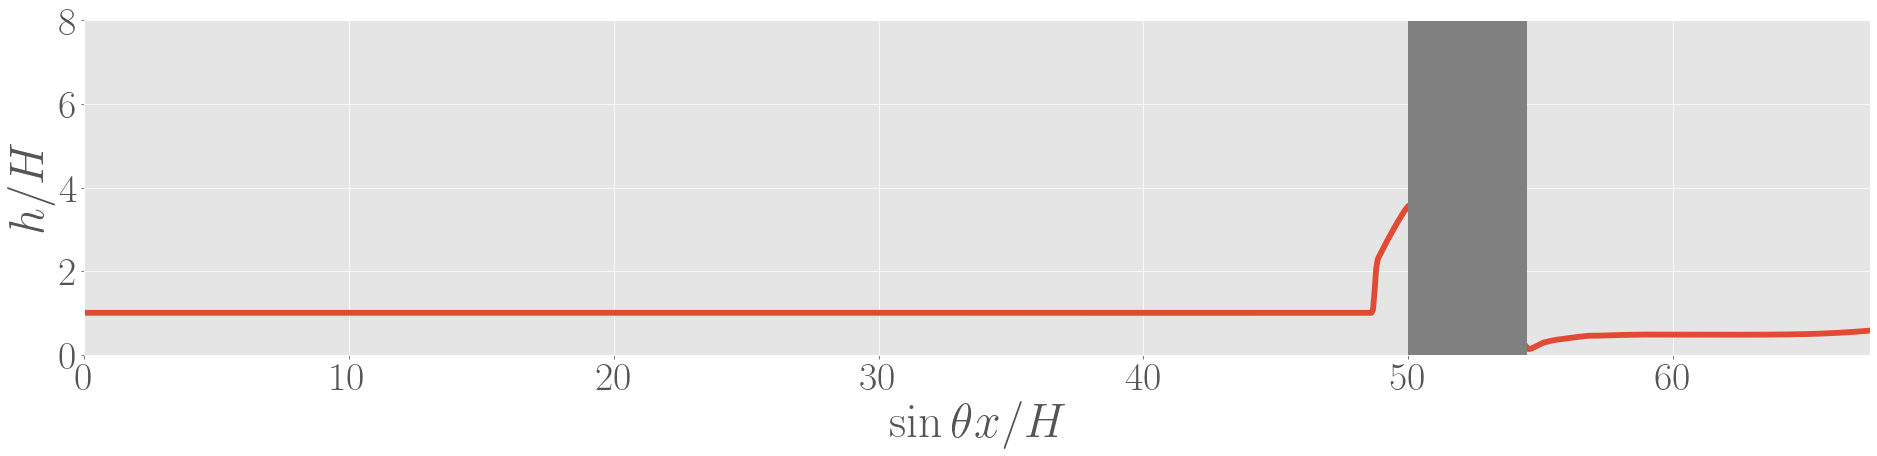

In [14]:
# dynamic CD plot
fig, ax = plt.subplots()
plt.style.use('ggplot')
plt.rc('text', usetex=True)
ax.tick_params(axis='both', which='major', labelsize=40)
ax.tick_params(axis='both', which='minor', labelsize=40)
plt.rcParams['figure.figsize'] = [35.00, 8.2]
plt.xlim([0, lx_norm])
plt.ylim([0, 8])
plt.xticks(np.arange(0.0, (60.0+10), 10))
plt.yticks(np.arange(0.0, (8.0+2), 2))
plt.xlabel(r'$\sin\theta x/H$', fontsize = 48)
plt.ylabel(r'$h/H$', fontsize = 48)
plt.subplots_adjust(bottom=0.30)
# time_str = str(float("{:.2f}".format(0.0)))
# plt.title('$t='+time_str+'$'+' '+'$\mathrm{s}$', fontsize=22.5)
line, = ax.plot([], [], linewidth=5.8)
rect = plt.Rectangle((xb_norm, 0.0), width_norm, 8.0, facecolor='gray', fill=True, zorder=2)
ax.add_patch(rect)
def update(num, xCoord_norm, sol_comb_norm, line):
    plt.style.use('ggplot')
    plt.rc('text', usetex=True)
    ax.tick_params(axis='both', which='major', labelsize=40)
    ax.tick_params(axis='both', which='minor', labelsize=40)
    plt.rcParams['figure.figsize'] = [32.00, 8.0]
    plt.xlim([0, lx_norm])
    plt.ylim([0, 8])
    plt.xticks(np.arange(0.0, (60.0+10), 10))
    plt.xlabel(r'$\sin\theta x/H$', fontsize = 48)
    plt.ylabel(r'$h/H$', fontsize = 48)
    plt.subplots_adjust(bottom=0.30)
    h_norm = sol_comb_norm[:, num]
    xCoord_norm_inds = xCoord_norm.argsort()
    sorted_xCoord_norm = xCoord_norm[xCoord_norm_inds[::-1]]
    sorted_h_norm = h_norm[xCoord_norm_inds[::-1]]
    line.set_data(sorted_xCoord_norm, sorted_h_norm)
    rect = plt.Rectangle((xb_norm, 0.0), width_norm, 8.0, facecolor='gray', fill=True, zorder=2)
    ax.add_patch(rect)
    return line,

ani = animation.FuncAnimation(fig, update, file_num, fargs=[xCoord_norm, sol_comb_norm, line],
                              interval=6.0, blit=True)
ani.save('../cir_profiles_anim.mp4', dpi = 100)
plt.show()